In [6]:
import pandas as pd
import numpy as np
import chardet

import spacy


In [2]:
with open('./data/nlp_vader_textblob_classified_data.csv', 'rb') as f:
    f.readline()
    enc = chardet.detect(f.readline())  # or readline if the file is large
    
tweetData = pd.read_csv('./data/nlp_vader_textblob_classified_data.csv', encoding = enc['encoding'], index_col=False)
tweetData

,username,verified,followersCount,content,label,date,country,replyCount,retweetCount,likeCount,...,vader_neg,vader_neu,vader_pos,vader_comp,cleantext2,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,HuyThanhNguyen5,False,0,@unitedstandmufc @markgoldbridge get ole again...,-1.0,2022-08-31 15:12:54,India,0,0,0,...,0.046,0.819,0.134,0.7133,g e t o l e a g a i n t o t e l l ...,-1,0.600000,0.290000,1,-1
1,guaslackjack,False,125,best goal: bruno top assists: pogba ??: cristi...,1.0,2021-09-11 15:56:21,India,0,0,0,...,0.000,0.561,0.439,0.8225,b e s t g o a l : b r u n o t o p a s ...,1,0.400000,0.533333,1,1
2,gerryrb,False,935,@lost_souls_07 @kayinfinite28 @altyred2 @utdpl...,0.0,2022-09-03 14:29:34,Argentina,1,0,1,...,0.000,0.505,0.495,0.9562,i d o n o t k n o w i s t h ...,1,0.783333,0.450000,1,0
3,rickitten_,False,9,players spurs in old trafford #mufc #muntot ht...,0.0,2022-03-12 19:14:18,India,0,0,0,...,0.000,1.000,0.000,0.0000,p l a y e r s s p u r s i n o l d t r ...,0,0.200000,0.100000,1,0
4,saboteurDS,False,278,@tancredipalmeri why on earth would #mufc pay ...,-1.0,2022-08-28 12:07:34,India,0,0,2,...,0.045,0.643,0.312,0.8072,w h y o n e a r t h w o u l d p a ...,-1,0.500000,0.500000,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97393,ChelseaEleven,False,21757,"thank you for everything, Thomas Tuchel #CFC #...",NaN,2022-09-07 09:09:44+00:00,India,0,1,4,...,0.000,0.667,0.333,0.3612,t h a n k y o u f o r e v e r y t h i n ...,1,0.000000,0.000000,0,1
97394,amber_chelsea,False,2195,@Chukwuemekaa10 thanks for the pic Carney ????...,NaN,2022-08-27 13:17:33+00:00,Zimbabwe,0,0,4,...,0.000,0.580,0.420,0.4404,t h a n k s f o r t h e p i c c a r ...,1,0.200000,0.200000,1,1
97395,Dc_Solomon2,False,143,Contacts ongoing between Chelsea and Brighton ...,NaN,2022-09-07 11:25:44+00:00,Zimbabwe,0,0,1,...,0.000,1.000,0.000,0.0000,c o n t a c t s o n g o i n g b e t w e e ...,0,0.400000,0.400000,1,0
97396,Marcus_Bryan_,False,5439,Billy Gilmour left #ChelseaFC to join Brighton...,NaN,2022-09-08 16:43:30+00:00,Argentina,1,2,24,...,0.000,0.805,0.195,0.5574,b i l l y g i l m o u r l e f t t o ...,1,0.035897,0.000000,0,1


In [26]:
ner = spacy.load("en_core_web_sm")

doc = ner("@unitedstandmufc @markgoldbridge get ole again to tell a long conversation that everything was on the wheel, they trained so good, the sprit was amazing… and finally, our player kicked their manager out his job. the reporter just wants to find any word to have a shock article to get a view.")

ents = [(e.text, e.label_) for e in doc.ents]
print(ents)

def get_ents(input_text):
    doc = ner(input_text)
    return [(e.text, e.label_) for e in doc.ents]


[]


In [33]:
namedEntities = {} #dictionary to keep track of each named entity

def stitch_ent(ent):
    return f"{ent[0]}__{ent[1]}"


for tweet in tweetData["content"]:
    ents = get_ents(tweet)
    # maybe we need some preprocessing

    for ent in ents:
        ent = stitch_ent(ent)
        if ent in namedEntities.keys():
            namedEntities[ent] += 1
        else:
            namedEntities[ent] = 1


print(namedEntities)


{'#ggmu #__MONEY': 438, '#__CARDINAL': 30268, '#mufc__MONEY': 2096, '#muntot https://t.co/f3nkvdqcgt__MONEY': 1, '@tancredipalmeri__ORG': 1, '100__CARDINAL': 83, 'osimhen__ORG': 1, 'manchester united shirt__GPE': 1, "manchester united's__PERCENT": 6, '80__MONEY': 19, "sao paulo's__GPE": 1, '#united #utfr #__MONEY': 2, 'today__DATE': 3314, '80__CARDINAL': 29, '4time__CARDINAL': 1, '#muntot__MONEY': 223, 'jim ratcliffe__PERSON': 23, '#glazersout https://t.co/ms1hukrbyi__MONEY': 2, 'manchester united score__ORG': 1, '4__CARDINAL': 1318, '#epl #__MONEY': 912, '#ronaldo__MONEY': 56, '#antony #__MONEY': 43, '#oleout #__MONEY': 38, 'first__ORDINAL': 1915, '10 years__DATE': 27, '#manutd #__MONEY': 149, 'tonight__TIME': 1389, '#lcfc #__MONEY': 214, 'https://t.co/ulpyoxzkh7__ORG': 1, '#mufc #__MONEY': 717, '@jonathangooda__ORG': 5, 'tomorrow__DATE': 1456, 'deadline day__DATE': 63, 'dubravka__ORG': 10, 'cr7__PERSON': 134, 'n0-4arty__ORG': 1, 'cheerio ole__PERSON': 1, 'midweek__DATE': 29, 'manches

In [34]:
len(namedEntities.keys())

47118

In [35]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

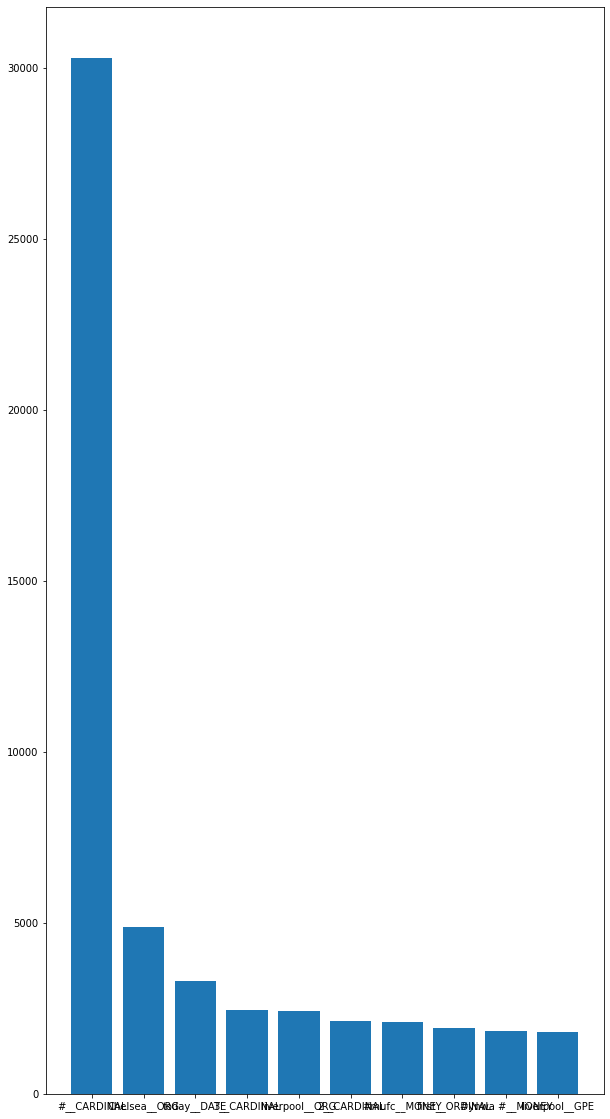

In [44]:
keys = list(namedEntities.keys())
keys.sort(reverse = True, key = lambda x: namedEntities[x])

top10x = keys[:10]
top10y = [namedEntities[i] for i in top10x]

fig = plt.figure(figsize = (10,20))

plt.bar(top10x, top10y)

In [45]:
for k in keys:
    if k[0] == "#":
        keys.remove(k)

<BarContainer object of 10 artists>

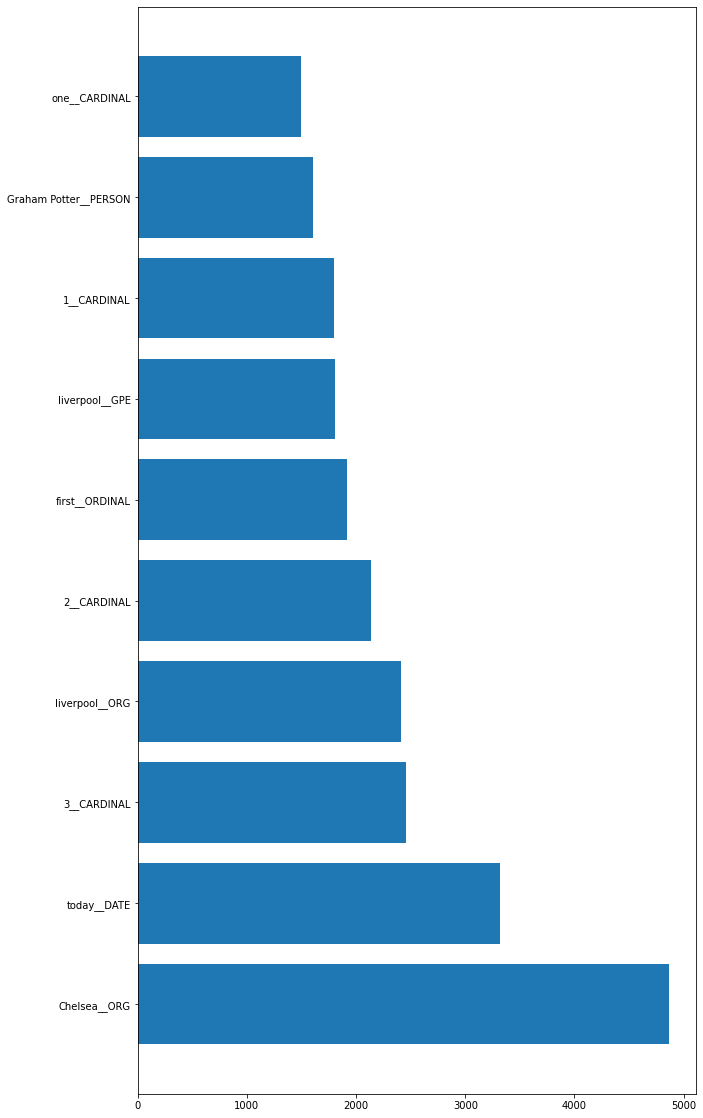

In [48]:
top10x = keys[:10]
top10y = [namedEntities[i] for i in top10x]

fig = plt.figure(figsize = (10,20))

plt.barh(top10x, top10y)